# Regresión lineal

## Introducción

<p style="text-align: justify;">La regresión lineal es una técnica estadística que permite obtener una aproximación de la relación estadística entre una variable dependiente y un conjunto de variables independientes. En este documento se explica brevemente cómo surgió y una explicación matemática del mismo.</p>

## Historia

<p style="text-align: justify;">Los primeros trabajos relacionados directamente con la regresión lineal fueron los de Legendre en 1805 y Gauss en 1809 acerca del método de mínimos cuadrados. En los artículos se exponía el método con el fin de determinar las órbitas de cuerpos celestes (particularmente, la de los cometas alrederor del sol). Unos años más tarde, Gauss desarrollaría con mayor profundidad este tema, enunciado una versión del teorema Gauss-Markov. </p>

<p style="text-align: justify;">Galton (1894) estudiando un fenómeno biológico con semillas de guisante, examinó la influencia de los progenitores en las características de los descendientes, una idea paralela a la concepción moderna de la regresión múltiple. Utilizó medidas de la estadística descriptiva: la mediana como medida de tendencia central y el rango intercuartílico como medida de variabilidad. Además, indagó acerca del valor exacto de la pendiente de una línea de regresión calculada con varias técnicas para estimar el cambio en Y versus el cambio en X en el diagrama de dispersión.</p> 
    
<p style="text-align: justify;">Pearson (1896) inició sus análisis acerca de la correlación y la regresión. Yule (1897) y Fisher (1922) también realizarían aportes, en especial sobre la distribución de las variables. Los trabajos posteriores de Pearson desarrollaron de modo más teórico la regresión múltiple.</p>

<p style="text-align: justify;">Durante los años 50's y 60's, los economistas comenzaron a realizar sus propias regresiones con calculadoras de escritorio. Con la evolución de la tecnología, el proceso de la estimación por regresión fue convirtiéndose en una tarea mucho más rápida. La regresión lineal ha sido fundamental para el desarrollo de las series de tiempo, las regresiones no párametricas y más recientemente en el campo del <i>machine learning</i>.</p>

## El método de mínimos cuadrados ordinarios

<p style="text-align: justify;">En primer lugar veremos el caso de la regresión lineal simple. El objetivo de este ejercicio es encontrar la recta de regresión que mejor se ajuste al modelo.</p>

<img src=https://www.scielo.sa.cr/img/revistas/tem/v29s5//0379-3982-tem-29-s5-33-gf3.jpg>

Un modelo de regresión lineal puede definirse con la siguiente expresión:

<img src=http://3.bp.blogspot.com/-Vz2adH3zaeI/VTPq4T2rmDI/AAAAAAAABr4/K-ssPFWG8Tc/s1600/Regresion_ecuacion_2.jpg>

Se desea que la suma de los errores al cuadrado sea lo más pequeña posible. Partiendo de la ecuación:
$$y_i = \beta_0 + \beta_1 x_i + u_i$$

Donde el subíndice $i$ representa un registro, se plantea un proceso de optimización en que a partir de los $n$ datos disponibles se estime el valor de los parámetros $\beta_0$ y $\beta_1$.

$$Q(\beta_0,\beta_1) = \sum_{i=1}^{n}{u_{i}}^2 = \sum_{i=1}^{n}(y_i - \beta_0 - \beta_1x_i)^2$$
$$\min \sum_{i=1}^{n}{u_{i}}^2 = \sum_{i=1}^{n}(y_i - \beta_0 - \beta_1x_i)^2$$
Derivando con respecto a $\beta_0$ y $\beta_1$ se obtiene:
$$\frac{dQ}{d\beta_0}= -2 \sum_{i=1}^{n}(y_i - \beta_0 - \beta_1x_i) = 0 $$ 
$$\sum_{i=1}^{n}y_i - n\beta_0 - \beta_1 \sum_{i=1}^{n}x_i = 0$$
$$\hat{\beta_0}=\bar{y}-\hat{\beta_1} \bar{x}$$ 
$$\frac{dQ}{d\beta_1}= 2 \sum_{i=1}^{n}(y_i - \beta_0 - \beta_1x_i)(-x_i) = 0$$
$$\sum_{i=1}^{n}y_i x_i - \beta_0 \sum_{i=1}^{n}x_i - \beta_0 \sum_{i=1}^{n}x_i^2 = 0$$
$$\hat{\beta_1} = \frac{\sum_{i=1}^{n}x_i y_i - n \bar{x} \bar{y}}{\sum_{i=1}^{n}x_i^2 - n\bar{x}^2}$$

En la regresión lineal múltiple, se puede expresar matricialmente:
$$Y=X \beta +U$$
Donde $Y$ es el vector de variables dependientes, $X$ es la matríz de términos independientes, $\beta$ es el vector de parámetros a estimar y $U$ es el vector de término de error.
Como $U=Y-X \beta$ y $U'=Y'- \beta ' X$, tenemos que:

$$U'U= (Y-X \beta)(Y'- \beta ' X) = Y'Y - Y'X \beta - \beta ' X'Y + \beta ' X'X\beta$$
$$U'U= Y'Y - 2 \beta ' X'Y + \beta ' X'X\beta$$

Al minimizar, se deriva con respecto al vector $\beta$:

$$\frac{dU'U}{d\beta}= -2X'Y + 2X'X \beta = 0$$
$$\hat{\beta}=(X'X)^{-1}X'Y$$

## Aplicación

A continuación se plantea una estimación para un ejercicio con cifras de inflación y desempleo para Colombia entre los años 1986 a 2015. 

In [29]:
import numpy as np
import pandas as pd 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib


file = 'https://raw.githubusercontent.com/jonnathan2/Regresion1/main/Datos%20inflaci%C3%B3n.csv'
dataset = pd.read_csv(file)
dataset.head

<bound method NDFrame.head of     PERIODO  INFLACION  DESEMPLEO
0      1986      20.95  12.200000
1      1987      24.02  10.200000
2      1988      28.12  10.400000
3      1989      26.12   9.400000
4      1990      32.36  10.600000
5      1991      26.82   9.400000
6      1992      25.13   9.800000
7      1993      22.60   7.800000
8      1994      22.59   8.000000
9      1995      19.46   9.500000
10     1996      21.63  11.300000
11     1997      17.68  12.000000
12     1998      16.70  15.600000
13     1999       9.23  18.000000
14     2000       8.75  19.690704
15     2001       7.65  16.760635
16     2002       6.99  15.739463
17     2003       6.49  14.458922
18     2004       5.50  13.363512
19     2005       4.85  11.619934
20     2006       4.48  11.788545
21     2007       5.69   9.459774
22     2008       7.67  10.478031
23     2009       2.00  11.808085
24     2010       3.17  10.405132
25     2011       3.73   9.889859
26     2012       2.44   9.673726
27     2013       

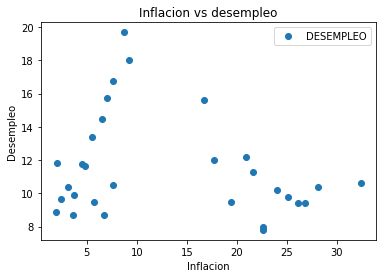

In [30]:
dataset.plot(x='INFLACION', y='DESEMPLEO', style='o')  
plt.title('Inflacion vs desempleo')  
plt.xlabel('Inflacion')  
plt.ylabel('Desempleo')  
plt.show()

In [36]:
dataX =dataset[["INFLACION"]]
X_train = np.array(dataX)
y_train =dataset["DESEMPLEO"]

regr = linear_model.LinearRegression()
 
# Entrenamiento
regr.fit(X_train, y_train)
 
# Predicciones
y_pred = regr.predict(X_train)
 
# Beta 1:
print('Beta 1: \n', regr.coef_)

# Beta 0:
print('Beta 0: \n', regr.intercept_)

# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))

Coefficient: 
 [-0.07407393]
Independent term: 
 12.494735090047826
Mean squared error: 8.35


## Conclusiones

<p style="text-align: justify;">La regresión lineal es uno de los avances más importantes de la estadística, debido a su gran utilidad y aplicabilidad. Como ejercicio de muestra, se enseñó un modelo simple en el que mostró una relación entre la inflación y el desempleo, donde la ecuación $Inflacion_i=12,4947 - 0.07Desempleo_i$ sería la que menor error cuadrado medio genera en la estimación por mínimos cuadrados.</p>

## Bibliografía

<p style="text-align: justify;">A.M. Legendre (1805). Nouvelles méthodes pour la détermination des orbites des comètes, Firmin Didot, Paris. “Sur la Méthode des moindres quarrés” appears as an appendix.</p>
    
<p style="text-align: justify;">Angrist, J. D., & Pischke, J. S. (2008). Mostly Harmless Econometrics: An Empiricist's Companion. Princeton University Press.</p>

<p style="text-align: justify;">C.F. Gauss. (1821/1823). Theoria combinationis observationum erroribus minimis obnoxiae.</p>
    
<p style="text-align: justify;">Galton, F. (1894), Natural Inheritance (5th ed.), New York: Macmillan and Company.</p> 
    
<p style="text-align: justify;">Pearson, K. (1896), "Mathematical Contributions to the Theory of Evolution. III. Regression, Heredity and Panmixia," Philosophical Transactions of the Royal Society of London, 187, 253-318</p>
    
<p style="text-align: justify;">Yule, G. (1897). "On the Theory of Correlation". Journal of the Royal Statistical Society. 60 (4): 812–54.</p>
    
<p style="text-align: justify;">Montgomery, D., Peck, E. y Vining, G. (2003). Introduccion al Analisis de Regresion Lineal. Tercera Edición. Editorial CECSA.</p>
    
<p style="text-align: justify;">Stanton, J. (2001) Galton, Pearson, and the Peas: A Brief History of Linear Regression for Statistics Instructors. Journal of Statistics Education, 9:3.</p>